# Imports

## Numpy imports 

In [22]:
from numpy import sin, cos, tan, real, imag,  log, conj
from numpy import array, append, linspace, arange
from numpy import add, sqrt, abs, dot
from numpy.random import random, random_sample, rand, seed
from numpy import concatenate, trace, diag
from numpy import ones, zeros, ones_like, zeros_like
# from numpy import pi

## Scipy imports

In [13]:
from scipy.integrate import ode, odeint, complex_ode
from scipy.optimize import minimize
from scipy.linalg import eigh, inv, norm, expm
# from scipy.linalg import 
# from scipy import

## Matplotlib imports

In [51]:
from matplotlib.pyplot import plot, figure, show, savefig, axes
from matplotlib.pyplot import xlabel, ylabel, title, legend
from matplotlib import rcParams
from matplotlib.pyplot import style 
from matplotlib.pyplot import xlim, ylim, axis 
# beware not same as axes
from matplotlib.pyplot import subplot, subplots, text
from matplotlib.pyplot import GridSpec
from matplotlib.pyplot import scatter, colorbar


pgf_with_rc_fonts = {"pgf.texsystem": "pdflatex"}
rcParams.update(pgf_with_rc_fonts)
style.use('seaborn-whitegrid')



## Math imports

In [15]:
from math import pi
from math import exp

## Cmath imports

## Date and datetime imports

In [16]:
from datetime import date
from datetime import datetime# now


## Os imports

In [17]:
from os import getcwd, mkdir, chdir
from os.path import abspath, join 


## Sympy imports

In [18]:
from sympy import Function, dsolve, Eq, Derivative, symbols
# x, y, z, t = symbols('x y z t')
# k, m, n = symbols('k m n', integer=True)
# f, g, h = symbols('f g h', cls=Function)

## Miscellaneous imports

## Extra useful functions

In [19]:
def rint(x):
    print("x = ", x)
    return None

# Lie_trotter code

## parameters

In [20]:
d = 2

## code functions

In [25]:
#import numpy as np
#import math
#from scipy import linalg

def calc_exp(X, h):
    rx, Ux = eigh(X)
    Ux_inv = inv(Ux)
    tx = diag(array([exp(h * i) for i in rx]))
    eX = Ux.dot(tx.dot(Ux_inv))
    return eX

def trotter(X,Y,Z,h,n):
    eZ = calc_exp(Z,h)
    eX = calc_exp(X,h/n)
    eY = calc_exp(Y,h/n)
    S = diag(ones(d))
    eXeY = eX.dot(eY)
    for i in range(n):
        S = S.dot(eXeY)
    return norm(eZ - S)/norm(eZ)

def trotter2nd(X,Y,Z,h,n):
    eZ = calc_exp(Z,h)
    eX = calc_exp(X,h/n*0.5)
    eY = calc_exp(Y,h/n)
    S = diag(ones(d))
    eXeYeX = eX.dot(eY.dot(eX))
    for i in range(n):
        S = S.dot(eXeYeX)
    return norm(eZ - S)/norm(eZ)


seed(1)
x1 = random_sample((d,d))
x2 = random_sample((d,d))
X = x1.dot(x1.T)
Y = x2.dot(x2.T)
Z = X + Y




In [26]:
x1

array([[4.17022005e-01, 7.20324493e-01],
       [1.14374817e-04, 3.02332573e-01]])

In [27]:
x2

array([[0.14675589, 0.09233859],
       [0.18626021, 0.34556073]])

In [28]:
X

array([[0.69277473, 0.21782525],
       [0.21782525, 0.091405  ]])

In [29]:
Y

array([[0.03006371, 0.05924338],
       [0.05924338, 0.15410508]])

In [30]:
Z

array([[0.72283844, 0.27706863],
       [0.27706863, 0.24551008]])

# Plots of error 

## n dependence plots

In [36]:
n_vec = arange(100) + 1

In [37]:
n_vec

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [38]:
n_error_1 = array([ trotter(X, Y, Z, 1.0, n_i) for n_i in n_vec])
    

In [39]:
n_error_1

array([0.02860811, 0.01419363, 0.00944849, 0.00708269, 0.00566479,
       0.00472004, 0.00404543, 0.00353957, 0.00314618, 0.00283149,
       0.00257403, 0.00235949, 0.00217797, 0.00202238, 0.00188755,
       0.00176956, 0.00166546, 0.00157293, 0.00149014, 0.00141563,
       0.00134822, 0.00128693, 0.00123097, 0.00117968, 0.00113249,
       0.00108893, 0.0010486 , 0.00101115, 0.00097628, 0.00094374,
       0.0009133 , 0.00088475, 0.00085794, 0.00083271, 0.00080892,
       0.00078645, 0.00076519, 0.00074505, 0.00072595, 0.0007078 ,
       0.00069054, 0.0006741 , 0.00065842, 0.00064345, 0.00062916,
       0.00061548, 0.00060238, 0.00058983, 0.0005778 , 0.00056624,
       0.00055514, 0.00054446, 0.00053419, 0.0005243 , 0.00051476,
       0.00050557, 0.0004967 , 0.00048814, 0.00047986, 0.00047187,
       0.00046413, 0.00045664, 0.0004494 , 0.00044237, 0.00043557,
       0.00042897, 0.00042257, 0.00041635, 0.00041032, 0.00040446,
       0.00039876, 0.00039322, 0.00038783, 0.00038259, 0.00037

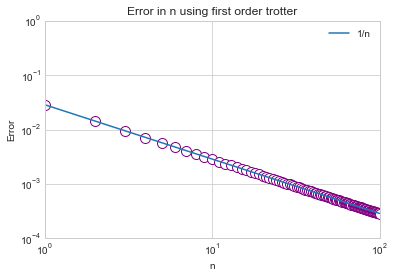

In [114]:
ax = axes()
ax.loglog(n_vec, n_error_1,
          color='white', markeredgecolor='purple', marker='o',  markersize=10 )
ax.loglog(n_vec, 1/n_vec*(n_error_1[0]/n_vec[0]), label = '1/n')
ax.set(xlim=(1, 1e2), ylim=(1e-4, 1e0),
       xlabel='n', ylabel='Error',
       title='Error in n using first order trotter');
ax.legend()


In [40]:
n_error_2 = array([ trotter2nd(X, Y, Z, 1.0, n_i) for n_i in n_vec])

In [41]:
n_error_2

array([1.77891558e-03, 4.49175646e-04, 2.00003128e-04, 1.12574654e-04,
       7.20693884e-05, 5.00563413e-05, 3.67797009e-05, 2.81612543e-05,
       2.22518405e-05, 1.80245545e-05, 1.48966707e-05, 1.25175617e-05,
       1.06659975e-05, 9.19680187e-06, 8.01150654e-06, 7.04141370e-06,
       6.23741394e-06, 5.56364695e-06, 4.99343273e-06, 4.50658927e-06,
       4.08762198e-06, 3.72447549e-06, 3.40765663e-06, 3.12960776e-06,
       2.88425174e-06, 2.66665717e-06, 2.47278851e-06, 2.29931778e-06,
       2.14348064e-06, 2.00296565e-06, 1.87582808e-06, 1.76042220e-06,
       1.65534777e-06, 1.55940744e-06, 1.47157239e-06, 1.39095468e-06,
       1.31678469e-06, 1.24839277e-06, 1.18519394e-06, 1.12667550e-06,
       1.07238638e-06, 1.02192867e-06, 9.74950137e-07, 9.31138122e-07,
       8.90214291e-07, 8.51930265e-07, 8.16063797e-07, 7.82415523e-07,
       7.50806255e-07, 7.21074471e-07, 6.93074423e-07, 6.66674159e-07,
       6.41754102e-07, 6.18205610e-07, 5.95929866e-07, 5.74836780e-07,
      

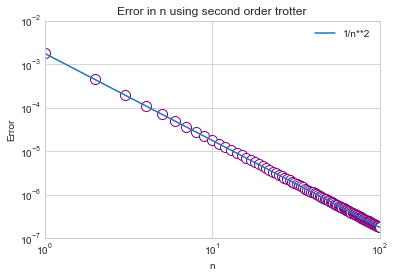

In [115]:
ax = axes()
ax.loglog(n_vec, n_error_2,
          color='white', markeredgecolor='purple', marker='o',  markersize=10 )
ax.loglog(n_vec, 1/(n_vec**2)*(n_error_2[0]/n_vec[0]), label = '1/n**2')
ax.set(xlim=(1, 1e2), ylim=(1e-7, 1e-2),
       xlabel='n', ylabel='Error',
       title='Error in n using second order trotter');
ax.legend()



## h dependence plots

In [66]:
h_vec = (arange(100) + 1)/100

In [67]:
h_vec

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [68]:
h_error_n1_1 = array([ trotter(X, Y, Z, h_i, 1) for h_i in h_vec])

In [69]:
h_error_n1_1

array([3.13229425e-06, 1.25287981e-05, 2.81883749e-05, 5.01091309e-05,
       7.82884165e-05, 1.12722827e-04, 1.53408204e-04, 2.00339639e-04,
       2.53511474e-04, 3.12917306e-04, 3.78549988e-04, 4.50401636e-04,
       5.28463628e-04, 6.12726612e-04, 7.03180510e-04, 7.99814523e-04,
       9.02617134e-04, 1.01157612e-03, 1.12667854e-03, 1.24791077e-03,
       1.37525848e-03, 1.50870668e-03, 1.64823967e-03, 1.79384110e-03,
       1.94549395e-03, 2.10318054e-03, 2.26688257e-03, 2.43658107e-03,
       2.61225645e-03, 2.79388851e-03, 2.98145644e-03, 3.17493881e-03,
       3.37431363e-03, 3.57955829e-03, 3.79064965e-03, 4.00756398e-03,
       4.23027702e-03, 4.45876395e-03, 4.69299944e-03, 4.93295763e-03,
       5.17861217e-03, 5.42993621e-03, 5.68690240e-03, 5.94948295e-03,
       6.21764958e-03, 6.49137358e-03, 6.77062581e-03, 7.05537668e-03,
       7.34559623e-03, 7.64125407e-03, 7.94231942e-03, 8.24876115e-03,
       8.56054774e-03, 8.87764735e-03, 9.20002778e-03, 9.52765651e-03,
      

In [72]:
h_error_n2_1 = array([ trotter(X, Y, Z, h_i, 2) for h_i in h_vec])

In [73]:
h_error_n4_1 = array([ trotter(X, Y, Z, h_i, 4) for h_i in h_vec])

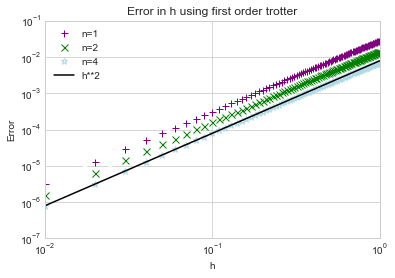

In [117]:
ax = axes()
ax.loglog(h_vec, h_error_n1_1, label = 'n=1', color='white',
          markeredgecolor='purple', marker='+',  markersize=7 )

ax.loglog(h_vec, h_error_n2_1, label = 'n=2', color='white',
          markeredgecolor='green', marker='x',  markersize=7 )

ax.loglog(h_vec, h_error_n4_1, label = 'n=4', color='white',
          markeredgecolor='lightblue', marker='*',  markersize=7 )
ax.loglog(h_vec, ((h_vec**2)*(h_error_n4_1[0]/(h_vec[0]**2))), 
          label = 'h**2', color='black')
ax.set(xlim=(1e-2, 1e0), ylim=(1e-7, 1e-1),
       xlabel='h', ylabel='Error',
       title='Error in h using first order trotter');
ax.legend()

In [95]:
h_vec**2

array([1.000e-04, 4.000e-04, 9.000e-04, 1.600e-03, 2.500e-03, 3.600e-03,
       4.900e-03, 6.400e-03, 8.100e-03, 1.000e-02, 1.210e-02, 1.440e-02,
       1.690e-02, 1.960e-02, 2.250e-02, 2.560e-02, 2.890e-02, 3.240e-02,
       3.610e-02, 4.000e-02, 4.410e-02, 4.840e-02, 5.290e-02, 5.760e-02,
       6.250e-02, 6.760e-02, 7.290e-02, 7.840e-02, 8.410e-02, 9.000e-02,
       9.610e-02, 1.024e-01, 1.089e-01, 1.156e-01, 1.225e-01, 1.296e-01,
       1.369e-01, 1.444e-01, 1.521e-01, 1.600e-01, 1.681e-01, 1.764e-01,
       1.849e-01, 1.936e-01, 2.025e-01, 2.116e-01, 2.209e-01, 2.304e-01,
       2.401e-01, 2.500e-01, 2.601e-01, 2.704e-01, 2.809e-01, 2.916e-01,
       3.025e-01, 3.136e-01, 3.249e-01, 3.364e-01, 3.481e-01, 3.600e-01,
       3.721e-01, 3.844e-01, 3.969e-01, 4.096e-01, 4.225e-01, 4.356e-01,
       4.489e-01, 4.624e-01, 4.761e-01, 4.900e-01, 5.041e-01, 5.184e-01,
       5.329e-01, 5.476e-01, 5.625e-01, 5.776e-01, 5.929e-01, 6.084e-01,
       6.241e-01, 6.400e-01, 6.561e-01, 6.724e-01, 

In [76]:
h_error_n1_2 = array([ trotter2nd(X, Y, Z, h_i, 1) for h_i in h_vec])

In [77]:
h_error_n2_2 = array([ trotter2nd(X, Y, Z, h_i, 2) for h_i in h_vec])

In [78]:
h_error_n4_2 = array([ trotter2nd(X, Y, Z, h_i, 4) for h_i in h_vec])

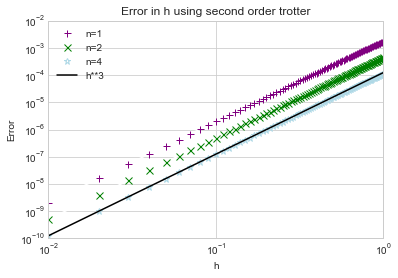

In [118]:
ax = axes()
ax.loglog(h_vec, h_error_n1_2, label = 'n=1', color='white',
          markeredgecolor='purple', marker='+',  markersize=7 )

ax.loglog(h_vec, h_error_n2_2, label = 'n=2', color='white',
          markeredgecolor='green', marker='x',  markersize=7 )

ax.loglog(h_vec, h_error_n4_2, label = 'n=4', color='white',
          markeredgecolor='lightblue', marker='*',  markersize=7 )
ax.loglog(h_vec, ((h_vec**3)*(h_error_n4_2[0]/(h_vec[0]**3))), 
          label = 'h**3', color='black')
ax.set(xlim=(1e-2, 1e0), ylim=(1e-10, 1e-2),
       xlabel='h', ylabel='Error',
       title='Error in h using second order trotter');
ax.legend()

# Actual original code which uses gnuplot

### sub sub topic 1

In [ ]:
n_dependence(X,Y,Z,1.0,1)
n_dependence(X,Y,Z,1.0,2)

h_dependence(X,Y,Z,1,1)
h_dependence(X,Y,Z,2,1)
h_dependence(X,Y,Z,4,1)

h_dependence(X,Y,Z,1,2)
h_dependence(X,Y,Z,2,2)
h_dependence(X,Y,Z,4,2)



In [ ]:
def n_dependence(X,Y,Z,h,order):
    filename = "n_%x.dat" % order
    t = trotter if order == 1 else trotter2nd
    print filename
    f = open(filename,'w')
    for i in range(100):
        n = i+1
        f.write(str(n) + " " +  str(t(X,Y,Z,h,n)))
        f.write("\n")
    f.close()

def h_dependence(X,Y,Z,n, order):
    t = trotter if order == 1 else trotter2nd
    filename = "h%x_%x.dat" %(n, order)
    print filename
    f = open(filename,'w')
    for i in range(100):
        h = (i+1)/100.0
        f.write(str(h) + " " +  str(t(X,Y,Z,h,n)))
        f.write("\n")
    f.close()




# My various errors while preparing

In [ ]:
for i in range(100):

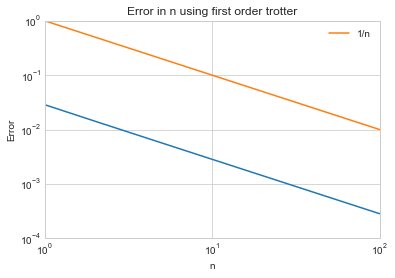

In [52]:
ax = axes()
ax.loglog(n_vec, n_error_1, )
ax.loglog(n_vec, 1/n_vec, label = '1/n')
ax.set(xlim=(1, 1e2), ylim=(1e-4, 1e0),
       xlabel='n', ylabel='Error',
       title='Error in n using first order trotter');
ax.legend()



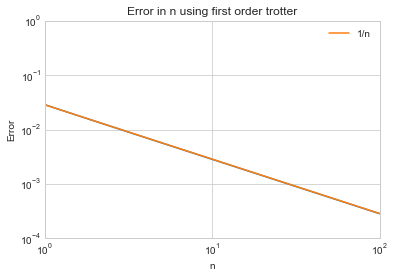

In [53]:
ax = axes()
ax.loglog(n_vec, n_error_1, )
ax.loglog(n_vec, 1/n_vec*n_error_1[0], label = '1/n')
ax.set(xlim=(1, 1e2), ylim=(1e-4, 1e0),
       xlabel='n', ylabel='Error',
       title='Error in n using first order trotter');
ax.legend()



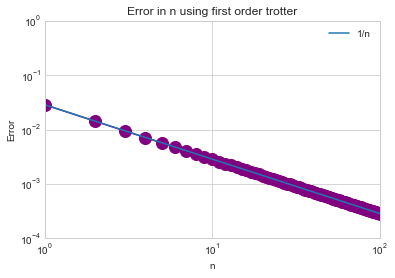

In [58]:
ax = axes()
ax.loglog(n_vec, n_error_1, color='purple', marker='o',  markersize=12 )
ax.loglog(n_vec, 1/n_vec*n_error_1[0], label = '1/n')
ax.set(xlim=(1, 1e2), ylim=(1e-4, 1e0),
       xlabel='n', ylabel='Error',
       title='Error in n using first order trotter');
ax.legend()



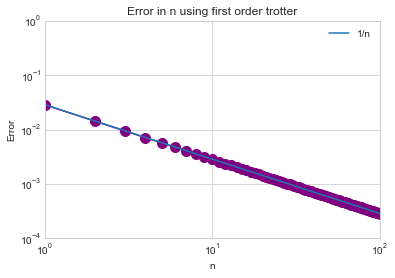

In [59]:
ax = axes()
ax.loglog(n_vec, n_error_1, color='purple', marker='o',  markersize=10 )
ax.loglog(n_vec, 1/n_vec*n_error_1[0], label = '1/n')
ax.set(xlim=(1, 1e2), ylim=(1e-4, 1e0),
       xlabel='n', ylabel='Error',
       title='Error in n using first order trotter');
ax.legend()



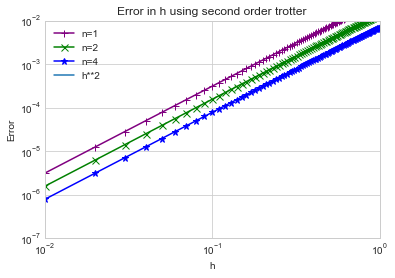

In [79]:
ax = axes()
ax.loglog(h_vec, h_error_n1_1, label = 'n=1',
          color='purple', marker='+',  markersize=7 )

ax.loglog(h_vec, h_error_n2_1, label = 'n=2',
          color='green', marker='x',  markersize=7 )

ax.loglog(h_vec, h_error_n4_1, label = 'n=4',
          color='blue', marker='*',  markersize=7 )
ax.loglog(n_vec, (h_vec**2)*h_error_n4_1[0], label = 'h**2')
ax.set(xlim=(1e-2, 1e0), ylim=(1e-7, 1e-2),
       xlabel='h', ylabel='Error',
       title='Error in h using second order trotter');
ax.legend()





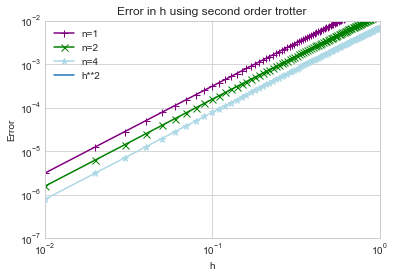

In [81]:
ax = axes()
ax.loglog(h_vec, h_error_n1_1, label = 'n=1',
          color='purple', marker='+',  markersize=7 )

ax.loglog(h_vec, h_error_n2_1, label = 'n=2',
          color='green', marker='x',  markersize=7 )

ax.loglog(h_vec, h_error_n4_1, label = 'n=4',
          color='lightblue', marker='*',  markersize=7 )
ax.loglog(n_vec, (h_vec**2)*h_error_n4_1[0], label = 'h**2')
ax.set(xlim=(1e-2, 1e0), ylim=(1e-7, 1e-2),
       xlabel='h', ylabel='Error',
       title='Error in h using second order trotter');
ax.legend()





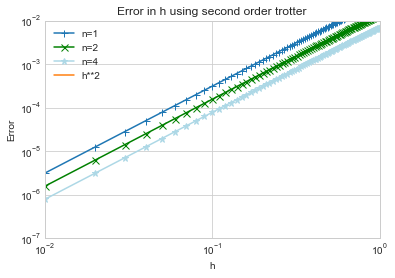

In [83]:
ax = axes()
ax.loglog(h_vec, h_error_n1_1, label = 'n=1',
          markerfacecolor='purple', marker='+',  markersize=7 )

ax.loglog(h_vec, h_error_n2_1, label = 'n=2',
          color='green', marker='x',  markersize=7 )

ax.loglog(h_vec, h_error_n4_1, label = 'n=4',
          color='lightblue', marker='*',  markersize=7 )
ax.loglog(n_vec, (h_vec**2)*h_error_n4_1[0], label = 'h**2')
ax.set(xlim=(1e-2, 1e0), ylim=(1e-7, 1e-2),
       xlabel='h', ylabel='Error',
       title='Error in h using second order trotter');
ax.legend()




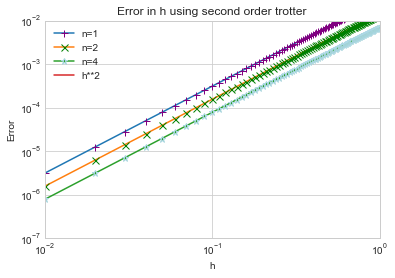

In [85]:
ax = axes()
ax.loglog(h_vec, h_error_n1_1, label = 'n=1',
          markeredgecolor='purple', marker='+',  markersize=7 )

ax.loglog(h_vec, h_error_n2_1, label = 'n=2',
          markeredgecolor='green', marker='x',  markersize=7 )

ax.loglog(h_vec, h_error_n4_1, label = 'n=4',
          markeredgecolor='lightblue', marker='*',  markersize=7 )
ax.loglog(n_vec, (h_vec**2)*h_error_n4_1[0], label = 'h**2')
ax.set(xlim=(1e-2, 1e0), ylim=(1e-7, 1e-2),
       xlabel='h', ylabel='Error',
       title='Error in h using second order trotter');
ax.legend()



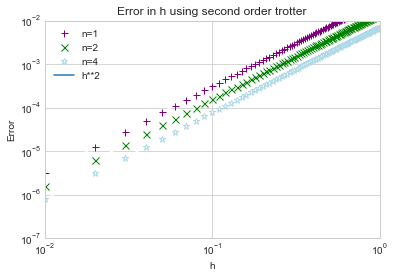

In [87]:
ax = axes()
ax.loglog(h_vec, h_error_n1_1, label = 'n=1', color='white',
          markeredgecolor='purple', marker='+',  markersize=7 )

ax.loglog(h_vec, h_error_n2_1, label = 'n=2', color='white',
          markeredgecolor='green', marker='x',  markersize=7 )

ax.loglog(h_vec, h_error_n4_1, label = 'n=4', color='white',
          markeredgecolor='lightblue', marker='*',  markersize=7 )
ax.loglog(n_vec, (h_vec**2)*h_error_n4_1[0], label = 'h**2')
ax.set(xlim=(1e-2, 1e0), ylim=(1e-7, 1e-2),
       xlabel='h', ylabel='Error',
       title='Error in h using second order trotter');
ax.legend()



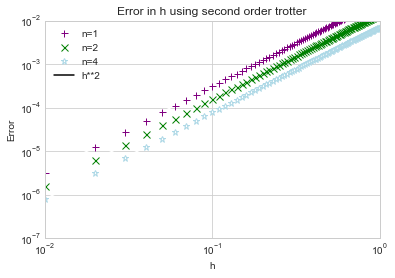

In [89]:
ax = axes()
ax.loglog(h_vec, h_error_n1_1, label = 'n=1', color='white',
          markeredgecolor='purple', marker='+',  markersize=7 )

ax.loglog(h_vec, h_error_n2_1, label = 'n=2', color='white',
          markeredgecolor='green', marker='x',  markersize=7 )

ax.loglog(h_vec, h_error_n4_1, label = 'n=4', color='white',
          markeredgecolor='lightblue', marker='*',  markersize=7 )
ax.loglog(n_vec, (h_vec**2)*h_error_n4_1[0], label = 'h**2', color='black')
ax.set(xlim=(1e-2, 1e0), ylim=(1e-7, 1e-2),
       xlabel='h', ylabel='Error',
       title='Error in h using second order trotter');
ax.legend()



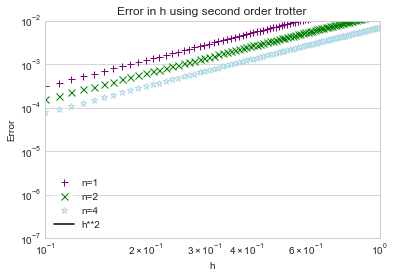

In [91]:
ax = axes()
ax.loglog(h_vec, h_error_n1_1, label = 'n=1', color='white',
          markeredgecolor='purple', marker='+',  markersize=7 )

ax.loglog(h_vec, h_error_n2_1, label = 'n=2', color='white',
          markeredgecolor='green', marker='x',  markersize=7 )

ax.loglog(h_vec, h_error_n4_1, label = 'n=4', color='white',
          markeredgecolor='lightblue', marker='*',  markersize=7 )
ax.loglog(n_vec, (h_vec**2)*h_error_n4_1[0], label = 'h**2', color='black')
ax.set(xlim=(1e-1, 1e0), ylim=(1e-7, 1e-2),
       xlabel='h', ylabel='Error',
       title='Error in h using second order trotter');
ax.legend()



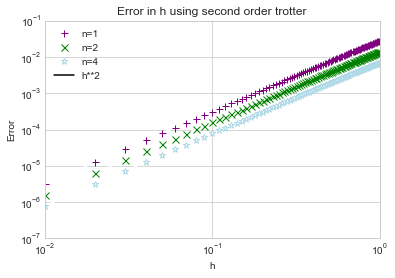

In [93]:
ax = axes()
ax.loglog(h_vec, h_error_n1_1, label = 'n=1', color='white',
          markeredgecolor='purple', marker='+',  markersize=7 )

ax.loglog(h_vec, h_error_n2_1, label = 'n=2', color='white',
          markeredgecolor='green', marker='x',  markersize=7 )

ax.loglog(h_vec, h_error_n4_1, label = 'n=4', color='white',
          markeredgecolor='lightblue', marker='*',  markersize=7 )
ax.loglog(n_vec, (h_vec**2)*h_error_n4_1[0], label = 'h**2', color='black')
ax.set(xlim=(1e-2, 1e0), ylim=(1e-7, 1e-1),
       xlabel='h', ylabel='Error',
       title='Error in h using second order trotter');
ax.legend()



In [ ]:
color='white',

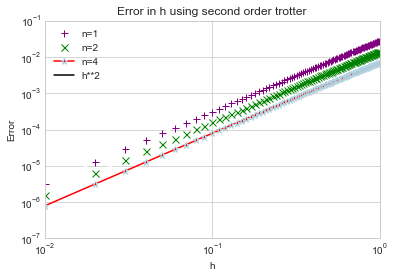

In [99]:
ax = axes()
ax.loglog(h_vec, h_error_n1_1, label = 'n=1', color='white',
          markeredgecolor='purple', marker='+',  markersize=7 )

ax.loglog(h_vec, h_error_n2_1, label = 'n=2', color='white',
          markeredgecolor='green', marker='x',  markersize=7 )

ax.loglog(h_vec, h_error_n4_1, label = 'n=4', color='red',
          markeredgecolor='lightblue', marker='*',  markersize=7 )
ax.loglog(n_vec, h_vec**2/h_error_n4_1[0], label = 'h**2', color='black')
ax.set(xlim=(1e-2, 1e0), ylim=(1e-7, 1e-1),
       xlabel='h', ylabel='Error',
       title='Error in h using second order trotter');
ax.legend()



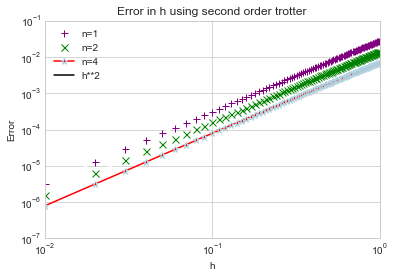

In [101]:
ax = axes()
ax.loglog(h_vec, h_error_n1_1, label = 'n=1', color='white',
          markeredgecolor='purple', marker='+',  markersize=7 )

ax.loglog(h_vec, h_error_n2_1, label = 'n=2', color='white',
          markeredgecolor='green', marker='x',  markersize=7 )

ax.loglog(h_vec, h_error_n4_1, label = 'n=4', color='red',
          markeredgecolor='lightblue', marker='*',  markersize=7 )
ax.loglog(h_vec, h_vec**2/h_error_n4_1[0], label = 'h**2', color='black')
ax.set(xlim=(1e-2, 1e0), ylim=(1e-7, 1e-1),
       xlabel='h', ylabel='Error',
       title='Error in h using second order trotter');
ax.legend()



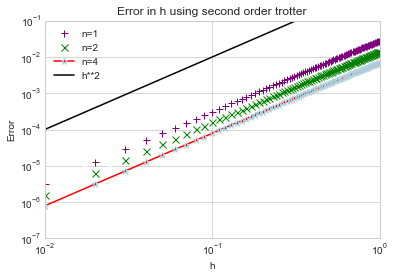

In [103]:
ax = axes()
ax.loglog(h_vec, h_error_n1_1, label = 'n=1', color='white',
          markeredgecolor='purple', marker='+',  markersize=7 )

ax.loglog(h_vec, h_error_n2_1, label = 'n=2', color='white',
          markeredgecolor='green', marker='x',  markersize=7 )

ax.loglog(h_vec, h_error_n4_1, label = 'n=4', color='red',
          markeredgecolor='lightblue', marker='*',  markersize=7 )
ax.loglog(h_vec, h_vec**2, label = 'h**2', color='black')
ax.set(xlim=(1e-2, 1e0), ylim=(1e-7, 1e-1),
       xlabel='h', ylabel='Error',
       title='Error in h using second order trotter');
ax.legend()



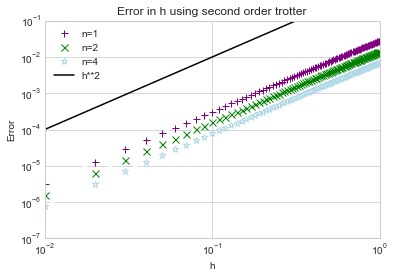

In [105]:
ax = axes()
ax.loglog(h_vec, h_error_n1_1, label = 'n=1', color='white',
          markeredgecolor='purple', marker='+',  markersize=7 )

ax.loglog(h_vec, h_error_n2_1, label = 'n=2', color='white',
          markeredgecolor='green', marker='x',  markersize=7 )

ax.loglog(h_vec, h_error_n4_1, label = 'n=4', color='white',
          markeredgecolor='lightblue', marker='*',  markersize=7 )
ax.loglog(h_vec, h_vec**2, label = 'h**2', color='black')
ax.set(xlim=(1e-2, 1e0), ylim=(1e-7, 1e-1),
       xlabel='h', ylabel='Error',
       title='Error in h using second order trotter');
ax.legend()



In [ ]:
h_vec**2

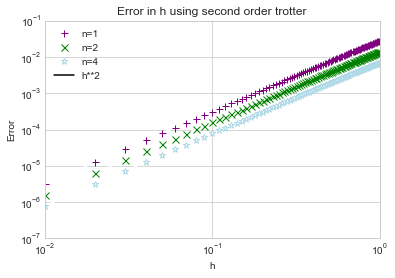

In [108]:
ax = axes()
ax.loglog(h_vec, h_error_n1_1, label = 'n=1', color='white',
          markeredgecolor='purple', marker='+',  markersize=7 )

ax.loglog(h_vec, h_error_n2_1, label = 'n=2', color='white',
          markeredgecolor='green', marker='x',  markersize=7 )

ax.loglog(h_vec, h_error_n4_1, label = 'n=4', color='white',
          markeredgecolor='lightblue', marker='*',  markersize=7 )
ax.loglog(h_vec, ((h_vec**2)/h_error_n4_1[0]), label = 'h**2', color='black')
ax.set(xlim=(1e-2, 1e0), ylim=(1e-7, 1e-1),
       xlabel='h', ylabel='Error',
       title='Error in h using second order trotter');
ax.legend()



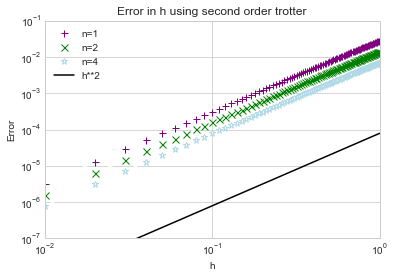

In [111]:
ax = axes()
ax.loglog(h_vec, h_error_n1_1, label = 'n=1', color='white',
          markeredgecolor='purple', marker='+',  markersize=7 )

ax.loglog(h_vec, h_error_n2_1, label = 'n=2', color='white',
          markeredgecolor='green', marker='x',  markersize=7 )

ax.loglog(h_vec, h_error_n4_1, label = 'n=4', color='white',
          markeredgecolor='lightblue', marker='*',  markersize=7 )
ax.loglog(h_vec, ((h_vec**2)*(h_error_n4_1[0]/(h_vec[0]))), 
          label = 'h**2', color='black')
ax.set(xlim=(1e-2, 1e0), ylim=(1e-7, 1e-1),
       xlabel='h', ylabel='Error',
       title='Error in h using second order trotter');
ax.legend()



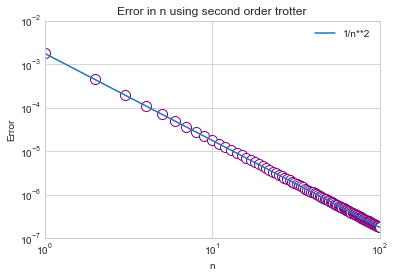

In [112]:
ax = axes()
ax.loglog(n_vec, n_error_2,
          color='white', markeredgecolor='purple', marker='o',  markersize=10 )
ax.loglog(n_vec, 1/(n_vec**2)*n_error_2[0], label = '1/n**2')
ax.set(xlim=(1, 1e2), ylim=(1e-7, 1e-2),
       xlabel='n', ylabel='Error',
       title='Error in n using second order trotter');
ax.legend()




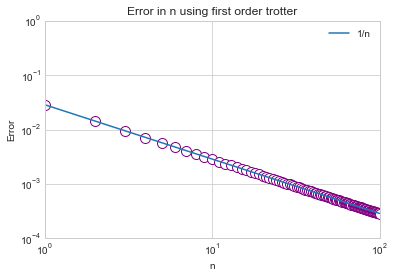

In [113]:
ax = axes()
ax.loglog(n_vec, n_error_1,
          color='white', markeredgecolor='purple', marker='o',  markersize=10 )
ax.loglog(n_vec, 1/n_vec*n_error_1[0], label = '1/n')
ax.set(xlim=(1, 1e2), ylim=(1e-4, 1e0),
       xlabel='n', ylabel='Error',
       title='Error in n using first order trotter');
ax.legend()



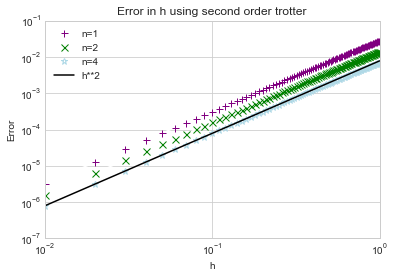

In [116]:
ax = axes()
ax.loglog(h_vec, h_error_n1_1, label = 'n=1', color='white',
          markeredgecolor='purple', marker='+',  markersize=7 )

ax.loglog(h_vec, h_error_n2_1, label = 'n=2', color='white',
          markeredgecolor='green', marker='x',  markersize=7 )

ax.loglog(h_vec, h_error_n4_1, label = 'n=4', color='white',
          markeredgecolor='lightblue', marker='*',  markersize=7 )
ax.loglog(h_vec, ((h_vec**2)*(h_error_n4_1[0]/(h_vec[0]**2))), 
          label = 'h**2', color='black')
ax.set(xlim=(1e-2, 1e0), ylim=(1e-7, 1e-1),
       xlabel='h', ylabel='Error',
       title='Error in h using second order trotter');
ax.legend()